<a href="https://colab.research.google.com/github/vitor-yuichi/Tweet_Pluviometer/blob/main/Tweeter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First temporal window

In [ ]:
import pandas as pd 
import matplotlib as plt 
import numpy as np 
from google.colab import drive
drive.mount('/content/gdrive') 
import datetime 
from collections import Counter

Mounted at /content/gdrive


## Filtering 01-03-2019 to 12-03-2019
The data were filtered in the temporal window from 16h to 20h





In [ ]:
df=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/Jan_a_08_03_2019.csv')
pd.set_option('display.max_rows', 30)
df


,date,id,username,text,retweets,favorites,permalink,mentions,hashtags,geo,emojis,lang,verified,replyCount,quoteCount
0,2019-01-01 23:57:13,1080251630023569409,mary4017,padrealessandrocampos #somostodospadrealessand...,0,0,NaN,NaN,#somostodospadrealessandrocampos #VivaAVida #b...,NaN,NaN,pt,NaN,0,0
1,2019-01-01 23:54:32,1080250955172663296,jennialvesz,Começando o ano com a melhor pessoa ao meu lad...,0,0,NaN,NaN,NaN,NaN,💑 ✨,pt,NaN,0,0
2,2019-01-01 23:53:55,1080250798729236480,RobsonKhalaf,Acabou de publicar uma foto em Canzuá https://...,0,0,NaN,NaN,NaN,NaN,NaN,pt,NaN,0,0
3,2019-01-01 23:52:04,1080250334839300097,luendewhenrike,Seguindo com a tentativa de manter a arte em m...,0,0,NaN,@,#drawing #women #beagirl #sunny #newyear,NaN,NaN,pt,NaN,0,0
4,2019-01-01 23:51:44,1080250252190457856,Marcosflopes2,Celebrando a Vida e a Conquista! Posse como Co...,0,0,NaN,NaN,NaN,NaN,NaN,pt,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58799,2019-03-08 00:03:17,1103808368827875328,FilipeFernan,Somos infinitos... \nAquele #tebetê em #pretoe...,0,0,NaN,NaN,#tebetê #pretoebranco,NaN,🤗 🙋,pt,NaN,0,0
58800,2019-03-08 00:02:12,1103808094033797121,CookieriabyM,Circo da Isadora! #circo #babygirl #umano #coo...,0,0,NaN,NaN,#circo #babygirl #umano #cookieria #carnaval #...,NaN,NaN,pt,NaN,0,0
58801,2019-03-08 00:01:50,1103808002048446465,SuellenRocha92,👩🏾‍🦱💐. em São Paulo Brazil https://t.co/MS9mQ...,0,2,NaN,NaN,NaN,NaN,👩 🏾 🦱 💐,pt,NaN,0,0
58802,2019-03-08 00:00:59,1103807791771332609,OnlyFuego,Look do #BlocoDaPabllo ✨\nStyling: @lucasgiova...,0,0,NaN,@lucasgiovanni,#BlocoDaPabllo,NaN,✨ 👑,pt,NaN,0,0


Selecting only the text columns and datetime 


In [ ]:
df=df.drop(columns=['id','username', 'retweets','favorites', 'permalink','mentions','hashtags','geo','emojis','lang', 'verified','replyCount','quoteCount'], axis=1)
df



,date,text
0,2019-01-01 23:57:13,padrealessandrocampos #somostodospadrealessand...
1,2019-01-01 23:54:32,Começando o ano com a melhor pessoa ao meu lad...
2,2019-01-01 23:53:55,Acabou de publicar uma foto em Canzuá https://...
3,2019-01-01 23:52:04,Seguindo com a tentativa de manter a arte em m...
4,2019-01-01 23:51:44,Celebrando a Vida e a Conquista! Posse como Co...
...,...,...
58799,2019-03-08 00:03:17,Somos infinitos... \nAquele #tebetê em #pretoe...
58800,2019-03-08 00:02:12,Circo da Isadora! #circo #babygirl #umano #coo...
58801,2019-03-08 00:01:50,👩🏾‍🦱💐. em São Paulo Brazil https://t.co/MS9mQ...
58802,2019-03-08 00:00:59,Look do #BlocoDaPabllo ✨\nStyling: @lucasgiova...


## Converting UTC DateTime to São Paulo datetime 
## Filtering by data (01-03 to 12-03)

In [ ]:
df.date=pd.to_datetime(df.date)
df.dtypes
df['date'] = df['date'].dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo')
df

,date,text
0,2019-01-01 21:57:13-02:00,padrealessandrocampos #somostodospadrealessand...
1,2019-01-01 21:54:32-02:00,Começando o ano com a melhor pessoa ao meu lad...
2,2019-01-01 21:53:55-02:00,Acabou de publicar uma foto em Canzuá https://...
3,2019-01-01 21:52:04-02:00,Seguindo com a tentativa de manter a arte em m...
4,2019-01-01 21:51:44-02:00,Celebrando a Vida e a Conquista! Posse como Co...
...,...,...
58799,2019-03-07 21:03:17-03:00,Somos infinitos... \nAquele #tebetê em #pretoe...
58800,2019-03-07 21:02:12-03:00,Circo da Isadora! #circo #babygirl #umano #coo...
58801,2019-03-07 21:01:50-03:00,👩🏾‍🦱💐. em São Paulo Brazil https://t.co/MS9mQ...
58802,2019-03-07 21:00:59-03:00,Look do #BlocoDaPabllo ✨\nStyling: @lucasgiova...


In [ ]:
df['Date'] = df['date'].dt.strftime('%d/%m/%Y')
df['Time'] = df['date'].dt.strftime('%H:%M')
df


,date,text,Date,Time
0,2019-01-01 21:57:13-02:00,padrealessandrocampos #somostodospadrealessand...,01/01/2019,21:57
1,2019-01-01 21:54:32-02:00,Começando o ano com a melhor pessoa ao meu lad...,01/01/2019,21:54
2,2019-01-01 21:53:55-02:00,Acabou de publicar uma foto em Canzuá https://...,01/01/2019,21:53
3,2019-01-01 21:52:04-02:00,Seguindo com a tentativa de manter a arte em m...,01/01/2019,21:52
4,2019-01-01 21:51:44-02:00,Celebrando a Vida e a Conquista! Posse como Co...,01/01/2019,21:51
...,...,...,...,...
58799,2019-03-07 21:03:17-03:00,Somos infinitos... \nAquele #tebetê em #pretoe...,07/03/2019,21:03
58800,2019-03-07 21:02:12-03:00,Circo da Isadora! #circo #babygirl #umano #coo...,07/03/2019,21:02
58801,2019-03-07 21:01:50-03:00,👩🏾‍🦱💐. em São Paulo Brazil https://t.co/MS9mQ...,07/03/2019,21:01
58802,2019-03-07 21:00:59-03:00,Look do #BlocoDaPabllo ✨\nStyling: @lucasgiova...,07/03/2019,21:00


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.sort_values(by="date")
mask =(df['date'] > '2019-03-01 00:00:01')
janela_1=df[mask]
janela_1

,date,text,Date,Time
51580,2019-03-01 00:00:41-03:00,Chapéus lindos da Sam Robertsla em São Paulo ...,2019-01-03,00:00
51579,2019-03-01 00:02:01-03:00,Programa Bem Estar da vida real. em São Paulo ...,2019-01-03,00:02
51578,2019-03-01 00:02:10-03:00,Acabou de publicar uma foto em São Paulo Braz...,2019-01-03,00:02
51577,2019-03-01 00:02:41-03:00,Tomar a Cruz é abraçar o estilo de vida propos...,2019-01-03,00:02
51576,2019-03-01 00:03:13-03:00,Não olhe pra trás não é pra lá que você vai...,2019-01-03,00:03
...,...,...,...,...
57605,2019-03-08 20:56:56-03:00,dias de luta dias de luta #8m #mulherescontra...,2019-08-03,20:56
57604,2019-03-08 20:57:10-03:00,🥀 em São Paulo Brazil https://t.co/5Rp50ixhrq,2019-08-03,20:57
57603,2019-03-08 20:57:19-03:00,Tá na hora daquele brinde silencioso cheio de...,2019-08-03,20:57
57602,2019-03-08 20:58:21-03:00,Hoje todas as vezes que eu liguei a TV eu vi...,2019-08-03,20:58


In [ ]:
janela_1 = janela_1.sort_values(by="date")
janela_1

,date,text,Date,Time
51580,2019-03-01 00:00:41-03:00,Chapéus lindos da Sam Robertsla em São Paulo ...,2019-01-03,00:00
51579,2019-03-01 00:02:01-03:00,Programa Bem Estar da vida real. em São Paulo ...,2019-01-03,00:02
51578,2019-03-01 00:02:10-03:00,Acabou de publicar uma foto em São Paulo Braz...,2019-01-03,00:02
51577,2019-03-01 00:02:41-03:00,Tomar a Cruz é abraçar o estilo de vida propos...,2019-01-03,00:02
51576,2019-03-01 00:03:13-03:00,Não olhe pra trás não é pra lá que você vai...,2019-01-03,00:03
...,...,...,...,...
57605,2019-03-08 20:56:56-03:00,dias de luta dias de luta #8m #mulherescontra...,2019-08-03,20:56
57604,2019-03-08 20:57:10-03:00,🥀 em São Paulo Brazil https://t.co/5Rp50ixhrq,2019-08-03,20:57
57603,2019-03-08 20:57:19-03:00,Tá na hora daquele brinde silencioso cheio de...,2019-08-03,20:57
57602,2019-03-08 20:58:21-03:00,Hoje todas as vezes que eu liguei a TV eu vi...,2019-08-03,20:58


##Filtering tweets by group of word (HIDRO/METEO)
## This time HIDRO and METEO will be grouped

In [ ]:
words=['chuva','rain','temporal', 'lightning', 'tempestade','nublado','trovão','rainbow','precipitação','alagado','alagamento','enchente','enxente','inundação','raio']
filtword=janela_1['text'].str.contains('|'.join(words), case=False)
filt_data=janela_1[filtword]
filt_data['text']
filt_data.to_csv(r'/content/gdrive/My Drive/Colab Notebooks/dadosfiltrado.csv',index=False)
pd.set_option('display.max_rows', None)
filt_data


,date,text,Date,Time
51435,2019-03-01 08:38:32-03:00,Look de amanhã com Sol ou Chuva para o Bloco d...,2019-01-03,08:38
51421,2019-03-01 08:55:07-03:00,Vamos de guarda chuva porque o tempo não muda ...,2019-01-03,08:55
51352,2019-03-01 09:57:11-03:00,Vamos de Leg 👊 #training #leg #legday #focus #...,2019-01-03,09:57
51332,2019-03-01 10:15:13-03:00,Café\nPara afogar desilusões\nPara aproveitar ...,2019-01-03,10:15
51320,2019-03-01 10:30:40-03:00,Há esqueci...Também é dia de ombro 😅 #ombros #...,2019-01-03,10:30
51253,2019-03-01 11:57:22-03:00,Carnaval que fala ?\n.\n.\n#filhoslindos #meuh...,2019-01-03,11:57
51239,2019-03-01 12:05:31-03:00,Previsão do tempo:\nChove lá fora.\nTempo de c...,2019-01-03,12:05
51221,2019-03-01 12:38:07-03:00,Semana chuvosa ..... ☔☔☔☔\n#ClickstarFotografi...,2019-01-03,12:38
51172,2019-03-01 13:41:24-03:00,Esses dias de chuva estão atrapalhando o tramp...,2019-01-03,13:41
51146,2019-03-01 14:09:16-03:00,#Repost @onerpmbr (get_repost)\n・・・\nRainha é ...,2019-01-03,14:09


In [ ]:
contagem=filt_data.Date.value_counts()
contagem

2019-03-03    22
2019-02-03    22
2019-07-03    16
2019-01-03    12
2019-06-03    12
2019-04-03    11
2019-08-03    10
2019-05-03     8
Name: Date, dtype: int64

In [ ]:

alagamentos=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/Selecao_Alag_Vitor.csv')
alagamentos 

,"SEQ,N,16,6","LONG,N,16,6","LAT,N,16,6","LOCAL_ED,C,254","LOCALIZACA,C,254","REFERENCIA,C,254","DATA,D","MES,N,16,6","H_INICIO,C,254","H_FIM,C,254","DURACAO,C,254","DUR_H,N,7,2"
0,7,"-46,638806","-23,549408",PC DA BANDEIRA,PC DA BANDEIRA,AV VINTE E TRES DE MAIO-CENTROBAIRRO-SE,01/01/2019,1,18:34:00,19:23:00,00:49:00,"0,82"
1,13,"-46,63858","-23,54891",PC DA BANDEIRA,PC DA BANDEIRA,ALTURA DO NUMERO 27-CENTROBAIRRO-SE,03/01/2019,1,17:27:00,17:42:00,00:15:00,"0,25"
2,14,"-46,63824","-23,55033",AV VINTE E TRES DE MAIO,AV VINTE E TRES DE MAIO LIBERDADE,PC DA BANDEIRA-SANTANAAEROPORTO-SE,03/01/2019,1,19:43:00,20:18:00,00:35:00,"0,58"
3,15,"-46,63483","-23,54211",TUN PAPA JOAO PAULO II,TN PAPA JOAO PAULO II REPUBLICA,AV PRESTES MAIA-SANTANAAEROPORTO-SE,03/01/2019,1,19:52:00,20:04:00,00:12:00,"0,2"
4,22,"-46,62947","-23,540356",R DA CANTAREIRA,R DA CANTAREIRA,AV MERCURIO-BAIRROCENTRO-SE,04/01/2019,1,14:45:00,15:03:00,00:18:00,"0,3"
5,28,"-46,62756","-23,53926",R PAULA SOUSA,R PAULA SOUSA,AV DO ESTADO-AMBOS - LOCAL-SE,04/01/2019,1,15:04:00,15:53:00,00:49:00,"0,82"
6,32,"-46,627042","-23,543123",AV MERCURIO,AV MERCURIO,PC S VITO-UNICO-SE,04/01/2019,1,15:56:00,17:56:00,02:00:00,2
7,33,"-46,6305","-23,53974",AV SEN QUEIROS,AV SEN QUEIROS,ALTURA DO NUMERO 587-UNICO-SE,04/01/2019,1,17:52:00,19:30:00,01:38:00,"1,63"
8,41,"-46,63824","-23,55033",PC DA BANDEIRA,P├ç DA BANDEIRA,AV 23 DE MAIO-CENTROBAIRRO-SE,08/01/2019,1,16:22:00,17:47:00,01:25:00,"1,42"
9,44,"-46,642458","-23,536496",AV RIO BRANCO,AV RIO BRANCO,AV DUQUE DE CAXIAS-BAIRROCENTRO-SE,08/01/2019,1,17:09:00,17:57:00,00:48:00,"0,8"


In [ ]:

filt_data


,date,text,Date,Time
51435,2019-03-01 08:38:32-03:00,Look de amanhã com Sol ou Chuva para o Bloco d...,2019-01-03,08:38
51421,2019-03-01 08:55:07-03:00,Vamos de guarda chuva porque o tempo não muda ...,2019-01-03,08:55
51352,2019-03-01 09:57:11-03:00,Vamos de Leg 👊 #training #leg #legday #focus #...,2019-01-03,09:57
51332,2019-03-01 10:15:13-03:00,Café\nPara afogar desilusões\nPara aproveitar ...,2019-01-03,10:15
51320,2019-03-01 10:30:40-03:00,Há esqueci...Também é dia de ombro 😅 #ombros #...,2019-01-03,10:30
51253,2019-03-01 11:57:22-03:00,Carnaval que fala ?\n.\n.\n#filhoslindos #meuh...,2019-01-03,11:57
51239,2019-03-01 12:05:31-03:00,Previsão do tempo:\nChove lá fora.\nTempo de c...,2019-01-03,12:05
51221,2019-03-01 12:38:07-03:00,Semana chuvosa ..... ☔☔☔☔\n#ClickstarFotografi...,2019-01-03,12:38
51172,2019-03-01 13:41:24-03:00,Esses dias de chuva estão atrapalhando o tramp...,2019-01-03,13:41
51146,2019-03-01 14:09:16-03:00,#Repost @onerpmbr (get_repost)\n・・・\nRainha é ...,2019-01-03,14:09


## Filtering the flood data to the first temporal window
## Selecting the data of the tweets according to the flood time

In [ ]:
alagamentos['DATA,D']=pd.to_datetime(alagamentos['DATA,D'])
mask1=alagamentos['MES,N,16,6']==3	
alag_janela1=alagamentos[mask1]
series1=alag_janela1['DATA,D']
series1
series1=series1.apply(lambda x: x.strftime('%Y-%d-%m'))

In [ ]:
series2=filt_data['Date'].apply(lambda x: x.strftime('%Y-%d-%m'))
series2

51435    2019-03-01
51421    2019-03-01
51352    2019-03-01
51332    2019-03-01
51320    2019-03-01
51253    2019-03-01
51239    2019-03-01
51221    2019-03-01
51172    2019-03-01
51146    2019-03-01
51133    2019-03-01
52621    2019-03-01
52493    2019-03-02
52289    2019-03-02
52262    2019-03-02
52169    2019-03-02
52134    2019-03-02
52091    2019-03-02
51924    2019-03-02
51903    2019-03-02
51898    2019-03-02
51873    2019-03-02
51844    2019-03-02
51822    2019-03-02
51804    2019-03-02
51774    2019-03-02
53615    2019-03-02
53612    2019-03-02
53594    2019-03-02
53592    2019-03-02
53575    2019-03-02
53552    2019-03-02
53524    2019-03-02
53509    2019-03-02
53432    2019-03-03
53402    2019-03-03
53401    2019-03-03
53387    2019-03-03
53338    2019-03-03
53237    2019-03-03
53216    2019-03-03
53183    2019-03-03
53133    2019-03-03
53126    2019-03-03
53124    2019-03-03
53085    2019-03-03
53036    2019-03-03
53027    2019-03-03
53010    2019-03-03
52860    2019-03-03


In [ ]:
tweets_flood=series2.str.contains('|'.join(series1), case=False)
tweets_flood
filt_data=filt_data[tweets_flood]
filt_data


,date,text,Date,Time
52493,2019-03-02 02:04:19-03:00,Meu Carnaval e com ela minha rainha grazielibo...,2019-02-03,02:04
52289,2019-03-02 11:32:30-03:00,Beeeeem tumblerzinho! #carnavrau #carnaval #ra...,2019-02-03,11:32
52262,2019-03-02 12:06:39-03:00,Chuva de glitter!! em Bar Bhama Ipiranga Com ...,2019-02-03,12:06
52169,2019-03-02 13:27:20-03:00,Quer? então faça acontecer porque a única coi...,2019-02-03,13:27
52134,2019-03-02 13:58:59-03:00,Ele é bom em fingir que não a ama para ela ma...,2019-02-03,13:58
52091,2019-03-02 14:41:38-03:00,#Frio❄ #Chuva🌦 #Sol☀️ tudo isso em apenas 2...,2019-02-03,14:41
51924,2019-03-02 17:48:23-03:00,Boa tarde galera. Bom Feriadão Minha musik G...,2019-02-03,17:48
51903,2019-03-02 18:10:53-03:00,Chove chuva! em São Paulo Brazil https://t.co...,2019-02-03,18:10
51898,2019-03-02 18:17:02-03:00,Blooms in the rain... 場所: São Paulo Brazil ht...,2019-02-03,18:17
51873,2019-03-02 18:48:31-03:00,O chuva quero que caia de vagar! #carnaval #20...,2019-02-03,18:48


In [ ]:
filt_data.to_csv(r'/content/gdrive/My Drive/Colab Notebooks/tweets_janela2.csv', index=False)

## Adjusting some data
## Adjusting the 09 to 12/03 data to timestamp


In [ ]:
adjust=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/ajustar.csv')
adjust

,Fidelidade,Datatime
0,Sun and rain ðŸŒ¦ \n.\n.\n.\n.\n#gratidao #obr...,2019-03-09 17:23:58
1,Esperando outro bloco passar antes da chuva!!ð...,2019-03-09 16:56:01
2,Tomem cuidado gente! A #chuvasp foi muito fort...,2019-03-11 08:30:32
3,Bom dia assim amanhece SÃ£o Paulo Aricanduva d...,2019-03-11 06:47:14


In [ ]:
adjust['Datatime ']=pd.to_datetime(adjust['Datatime '])
adjust['Dat'] = adjust['Datatime '].dt.strftime('%d/%m/%Y')
adjust['Time'] = adjust['Datatime '].dt.strftime('%H:%M')
adjust

,Fidelidade,Datatime,Dat,Time
0,Sun and rain ðŸŒ¦ \n.\n.\n.\n.\n#gratidao #obr...,2019-03-09 17:23:58,09/03/2019,17:23
1,Esperando outro bloco passar antes da chuva!!ð...,2019-03-09 16:56:01,09/03/2019,16:56
2,Tomem cuidado gente! A #chuvasp foi muito fort...,2019-03-11 08:30:32,11/03/2019,08:30
3,Bom dia assim amanhece SÃ£o Paulo Aricanduva d...,2019-03-11 06:47:14,11/03/2019,06:47


In [ ]:
adjust['Dat']=pd.to_datetime(adjust['Dat'])
adjust


,Fidelidade,Datatime,Dat,Time
0,Sun and rain ðŸŒ¦ \n.\n.\n.\n.\n#gratidao #obr...,2019-03-09 17:23:58,2019-09-03,17:23
1,Esperando outro bloco passar antes da chuva!!ð...,2019-03-09 16:56:01,2019-09-03,16:56
2,Tomem cuidado gente! A #chuvasp foi muito fort...,2019-03-11 08:30:32,2019-11-03,08:30
3,Bom dia assim amanhece SÃ£o Paulo Aricanduva d...,2019-03-11 06:47:14,2019-11-03,06:47


## Calculating fidelity-tweets frequency 

In [ ]:
fidelity=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/tweets_fid_01_012.csv')
fidelity

,fidelidade,Data,Time
0,Chove chuva! em São Paulo Brazil https://t.co...,2019-02-03,18:10
1,Blooms in the rain... 場所: São Paulo Brazil ht...,2019-02-03,18:17
2,O chuva quero que caia de vagar! #carnaval #20...,2019-02-03,18:48
3,Passa a chuva aqui em Casarão Augusta https://...,2019-02-03,19:14
4,Na chuva Na rua na fazenda ou numa casinha d...,2019-02-03,19:47
5,É um amor incondicional faça a tempestade que...,2019-02-03,20:06
6,Segue o bloco (mesmo co chuva). #sampa #carnav...,2019-05-03,17:21
7,Chuvaaaa em Bairro Bela Vista https://t.co/xE7...,2019-05-03,17:45
8,Apesar da chuva.\n#showroomdummy \n#sampa\n#be...,2019-05-03,18:49
9,Boa tarde galera. E hoje vai desabar de novo. ...,2019-07-03,14:58


In [ ]:
words=['chuva','rain','temporal', 'lightning', 'tempestade','nublado','trovão','rainbow','precipitação','alagado','alagamento','enchente','enxente','inundação']
listatw=fidelity['fidelidade'].tolist()
lol=fidelity['fidelidade'].str.split(expand=True).stack().value_counts()
lol=lol.to_frame()
lol.reset_index(inplace=True)
lol

,index,0
0,em,17
1,de,12
2,Paulo,10
3,Brazil,7
4,chuva,6
5,São,6
6,da,5
7,SÃ£o,4
8,que,4
9,#chuva,4


In [ ]:
mask3=lol['index'].str.contains('|'.join(words), case=False)
lol=lol[mask3]
lol

,index,0
4,chuva,6
9,#chuva,4
27,chuva.,2
30,tempestade,1
37,Chuvaaaa,1
43,rain...,1
46,rain,1
53,#tempestade,1
75,Tempestade⛈⛈⛈,1
105,chuva!,1


In [ ]:
lol.columns=['words', 'frequency']
lol



,words,frequency
4,chuva,6
9,#chuva,4
27,chuva.,2
30,tempestade,1
37,Chuvaaaa,1
43,rain...,1
46,rain,1
53,#tempestade,1
75,Tempestade⛈⛈⛈,1
105,chuva!,1


In [ ]:

lol.frequency.sum()

26

# Plots for the first temporal window
Graph (1): Time x frequency of filtered tweets (first temporal windows) \
Graph (2): Time x frequency of fidelity-tweets (first temporal windows) \
Graph (3): Table  (frequency of days) in tweets/floods


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

In [ ]:
s=contagem.to_frame()
s.reset_index(inplace=True)
s.columns=['Date', 'tweet']
s.Date=pd.to_datetime(s.Date)
s

,Date,tweet
0,2019-03-03,22
1,2019-02-03,22
2,2019-07-03,16
3,2019-01-03,12
4,2019-06-03,12
5,2019-04-03,11
6,2019-08-03,10
7,2019-05-03,8


## Graph(1)

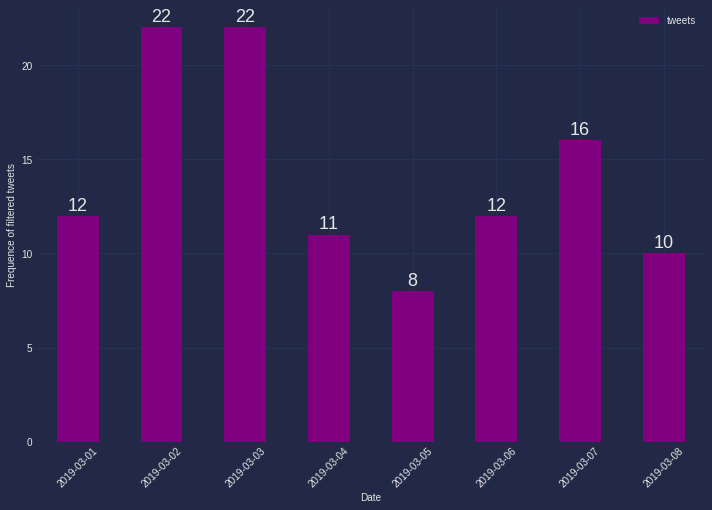

In [ ]:
#Graph (1)
plt.style.use("seaborn-dark") #estilo cyberpunk

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

s.Date=pd.to_datetime(s.Date, format='%Y-%d-%m')
s.sort_values(by="Date", inplace=True)
s['date'] = s['Date'].dt.strftime('%Y-%d-%m')
ax=s.plot.bar(x='date', y='tweet', color='purple', figsize=(12,8))
ax.set_xlabel("Date")
ax.set_ylabel("Frequence of filtered tweets")
ax.grid(color='#2A3459')
ax.legend(["tweets"])
plt.rcParams.update({'font.size': 18})
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

##Graph (2)

In [ ]:
dfidelity=fidelity.value_counts('Data', sort=True)
dfidelity=dfidelity.to_frame()
dfidelity.reset_index(inplace=True)
dfidelity.columns=["Date", "Frequence"]

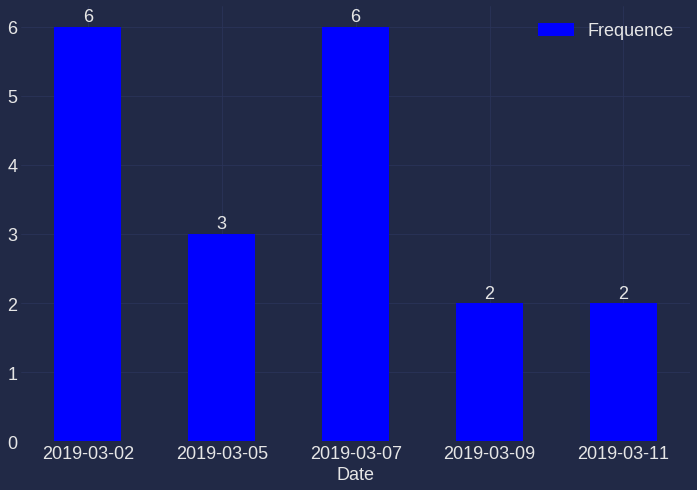

In [ ]:
#Graph 2
plt.style.use("seaborn-dark") #estilo cyberpunk

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
dfidelity.Date=pd.to_datetime(dfidelity.Date)
dfidelity.Date = dfidelity.Date.dt.strftime('%Y-%d-%m')
dfidelity=dfidelity.sort_values(by="Date")
ax1=dfidelity.plot.bar(x="Date", y='Frequence', color='blue', figsize=(12,8))
plt.rcParams.update({'font.size': 18})
plt.tick_params(axis='x', rotation=0)
ax1.grid(color='#2A3459')
for p in ax1.patches:
  ax1.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Graph (3)

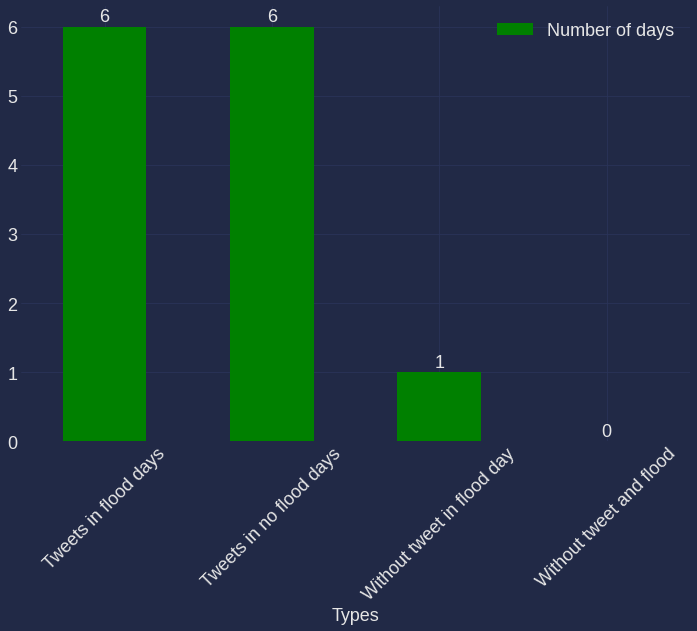

In [ ]:
table={"Types":['Tweets in flood days', 'Tweets in no flood days','Without tweet in flood day','Without tweet and flood'], "Number of days":['6','6','1','0']}
table=pd.DataFrame(table)
table
table['Number of days']=table['Number of days'].astype(int)
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax2=table.plot.bar(x='Types', y='Number of days', color='green', figsize=(12,8))
ax2.tick_params(axis='x', rotation=45)
ax2.grid(color='#2A3459')
for p in ax2.patches:
  ax2.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Plots for dispersion for the first temporal window



Text(0, 0.5, 'Frequency of Tweets')

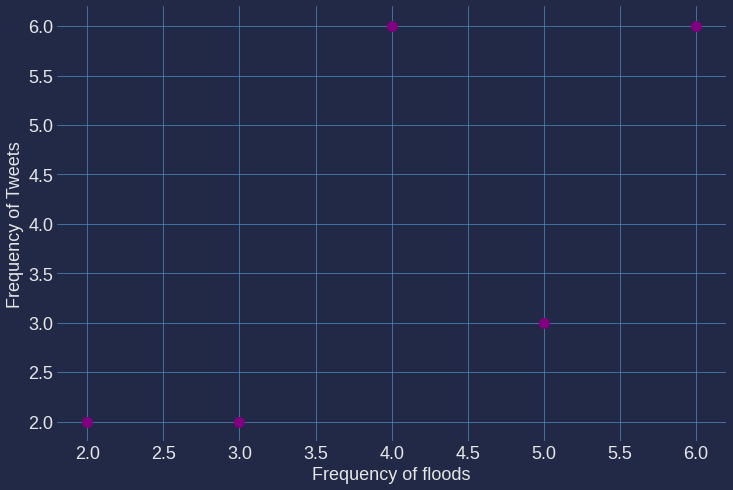

In [ ]:
#Scatter 1 Number of flood  X Number of Tweets 
floodscount=alag_janela1['DATA,D'].value_counts()
tweetscount=fidelity.Data.value_counts()
scater1=tweetscount.to_frame().join(floodscount.to_frame())
ax3 = scater1.plot.scatter(x='DATA,D', y='Data', c='purple', figsize=(12,8), s=100)
ax3.grid(color='steelblue')
ax3.set_xlabel("Frequency of floods")
ax3.set_ylabel("Frequency of Tweets")

In [ ]:
alag_janela1['DUR_H,N,7,2']=alag_janela1['DUR_H,N,7,2'].str.replace(',', '.').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
alagamentos

,"SEQ,N,16,6","LONG,N,16,6","LAT,N,16,6","LOCAL_ED,C,254","LOCALIZACA,C,254","REFERENCIA,C,254","DATA,D","MES,N,16,6","H_INICIO,C,254","H_FIM,C,254","DURACAO,C,254","DUR_H,N,7,2"
0,7,"-46,638806","-23,549408",PC DA BANDEIRA,PC DA BANDEIRA,AV VINTE E TRES DE MAIO-CENTROBAIRRO-SE,2019-01-01,1,18:34:00,19:23:00,00:49:00,"0,82"
1,13,"-46,63858","-23,54891",PC DA BANDEIRA,PC DA BANDEIRA,ALTURA DO NUMERO 27-CENTROBAIRRO-SE,2019-03-01,1,17:27:00,17:42:00,00:15:00,"0,25"
2,14,"-46,63824","-23,55033",AV VINTE E TRES DE MAIO,AV VINTE E TRES DE MAIO LIBERDADE,PC DA BANDEIRA-SANTANAAEROPORTO-SE,2019-03-01,1,19:43:00,20:18:00,00:35:00,"0,58"
3,15,"-46,63483","-23,54211",TUN PAPA JOAO PAULO II,TN PAPA JOAO PAULO II REPUBLICA,AV PRESTES MAIA-SANTANAAEROPORTO-SE,2019-03-01,1,19:52:00,20:04:00,00:12:00,"0,2"
4,22,"-46,62947","-23,540356",R DA CANTAREIRA,R DA CANTAREIRA,AV MERCURIO-BAIRROCENTRO-SE,2019-04-01,1,14:45:00,15:03:00,00:18:00,"0,3"
5,28,"-46,62756","-23,53926",R PAULA SOUSA,R PAULA SOUSA,AV DO ESTADO-AMBOS - LOCAL-SE,2019-04-01,1,15:04:00,15:53:00,00:49:00,"0,82"
6,32,"-46,627042","-23,543123",AV MERCURIO,AV MERCURIO,PC S VITO-UNICO-SE,2019-04-01,1,15:56:00,17:56:00,02:00:00,2
7,33,"-46,6305","-23,53974",AV SEN QUEIROS,AV SEN QUEIROS,ALTURA DO NUMERO 587-UNICO-SE,2019-04-01,1,17:52:00,19:30:00,01:38:00,"1,63"
8,41,"-46,63824","-23,55033",PC DA BANDEIRA,P├ç DA BANDEIRA,AV 23 DE MAIO-CENTROBAIRRO-SE,2019-08-01,1,16:22:00,17:47:00,01:25:00,"1,42"
9,44,"-46,642458","-23,536496",AV RIO BRANCO,AV RIO BRANCO,AV DUQUE DE CAXIAS-BAIRROCENTRO-SE,2019-08-01,1,17:09:00,17:57:00,00:48:00,"0,8"


Text(0, 0.5, 'Frequency of tweets ')

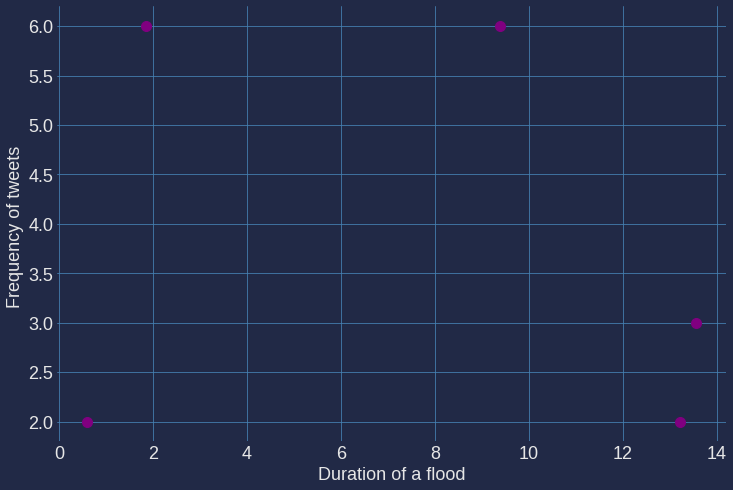

In [ ]:
alag_janela1=alag_janela1.copy()
scater2=alag_janela1[['DATA,D','DUR_H,N,7,2']]
duration=scater2.groupby(['DATA,D']).sum()
duration=duration.squeeze()
scater3=tweetscount.to_frame().join(duration.to_frame())
scater3
ax4 = scater3.plot.scatter(x='DUR_H,N,7,2', y='Data', c='purple', figsize=(12,8), s=100)
ax4.grid(color='steelblue')
ax4.set_xlabel("Duration of a flood")
ax4.set_ylabel("Frequency of tweets ")

In [ ]:
duration

DATA,D
2019-02-03     1.84
2019-03-19     0.82
2019-05-03    13.56
2019-07-03     9.39
2019-09-03     0.60
2019-10-03     6.03
2019-11-03    13.23
Name: DUR_H,N,7,2, dtype: float64

# Second Temporal Window 

In [ ]:
import pandas as pd 
import matplotlib as plt 
import numpy as np 
from google.colab import drive
drive.mount('/content/gdrive') 
import datetime 
from collections import Counter

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).



##Filtering words for the second window
Whole february


In [ ]:
words=['chuva','rain','temporal', 'lightning', 'tempestade','nublado','trovão','rainbow','precipitação','alagado','alagamento','enchente','enxente','inundação']
secondfilter=df['text'].str.contains('|'.join(words), case=False)
filt_window2=df[secondfilter]


##Filtering the tweets date for whole february

In [ ]:
filt_window2=filt_window2.copy()

mask0=((filt_window2['date']>'2019-02-01 00:01') & (filt_window2['date']<'2019-02-28 23:59'))
filt_window2=filt_window2[mask0]
filt_window2=filt_window2.sort_values(by='date')
filt_window2

,date,text,Date,Time
26240,2019-02-01 13:33:01-02:00,L E T ‘ S G O 🤟 #timeforgym #gym #training #f...,2019-01-02,13:33
26238,2019-02-01 13:36:09-02:00,Tudo que ganha foco ganha poder 👊 #gym #trai...,2019-01-02,13:36
26081,2019-02-01 17:18:51-02:00,Já em preparação para o 2º round! #rumoashehul...,2019-01-02,17:18
25935,2019-02-01 20:08:14-02:00,Segundo dia sem uma gota de chuva... em São Pa...,2019-01-02,20:08
25931,2019-02-01 20:15:10-02:00,Ai que calor!!! As paulistana num tão costumad...,2019-01-02,20:15
25883,2019-02-01 21:09:46-02:00,Muaythai personal training com esse casal sens...,2019-01-02,21:09
27527,2019-02-01 22:53:04-02:00,Board Game Night: Dead &amp; Breakfast\n\n#boa...,2019-01-02,22:53
27435,2019-02-02 02:17:14-02:00,Ah vida é dura mais ela só faz melhorar!\n\n# ...,2019-02-02,02:17
27423,2019-02-02 03:10:58-02:00,Filha de Iemanjá também é (do) mar. 💙 #Odoya R...,2019-02-02,03:10
27361,2019-02-02 09:22:10-02:00,Mesmo longe da Casa Grande firmo meu pensamen...,2019-02-02,09:22


## Calculating the frequency of words in Fidelity tweets

In [ ]:
fidelity_window2=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/fidelity_window2.csv')
fidelity_window2.columns=['date', 'text']
word_window2=fidelity_window2['text'].str.split(expand=True).stack().value_counts()
word_window2=word_window2.to_frame()

In [ ]:
words=['chuva','rain','temporal', 'lightning', 'tempestade','nublado','trovão','rainbow','precipitação','alagado','alagamento','enchente','enxente','inundação']
frequence_window2=word_window2[word_window2.index.str.contains('|'.join(words), case=False)]
frequence_window2

,0
chuva,10
#chuva,5
#rainyday,2
Chuva,2
#chovechuva,1
chuva..,1
Rainha,1
#chuvadeseguidores,1
rain.,1
#chuvas,1


##Floods for February 

In [ ]:
floods=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/Selecao_Alag_Vitor.csv')
x=(floods['MES,N,16,6']==2)
floods_window2=floods[x]
floods_window2
x1=floods_window2['DATA,D']
x1.dtypes

dtype('O')

In [ ]:
filt_window2['date']=pd.to_datetime(filt_window2.date)
filt_window2['Date'] = filt_window2['date'].dt.strftime('%d/%m/%Y')
filt_window2=filt_window2.copy()
tweets_window2=filt_window2[filt_window2['Date'].isin(x1)]
tweets_window2
tweets_window2.to_csv(r'/content/gdrive/My Drive/Colab Notebooks/tweets2_filtrar.csv', index=False)


# Plots for February
Graph (1)

## Graph (1) Strength tweets 

In [ ]:
filt_window2
filt_window2['Date'] =filt_window2.date.dt.strftime('%Y/%m/%d')


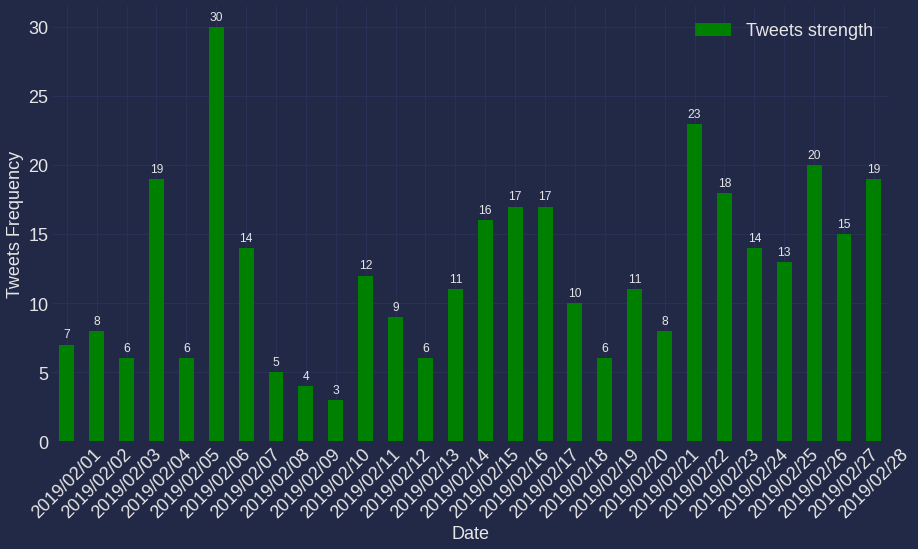

In [ ]:
tweets_strength=filt_window2.Date.value_counts()
tweets_strength=tweets_strength.to_frame()
tweets_strength.reset_index(inplace=True)
tweets_strength=tweets_strength.sort_values(by='index')
plt.style.use("seaborn-dark") #estilo cyberpunk

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
axes=tweets_strength.plot.bar(x='index',y='Date', color='green', figsize=(15,8))
axes.legend(['Tweets strength'])
axes.set_xlabel('Date')
axes.set_ylabel('Tweets Frequency')
plt.rcParams.update({'font.size': 12})
axes.tick_params(axis='x', rotation=45)
axes.grid(color='#2A3459')
for p in axes.patches:
  axes.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [ ]:
fidelity_window2.date=fidelity_window2.date.astype(str)
fidelity_window2[['date','time']]=fidelity_window2['date'].str.split(' ', 1, expand=True)
fidelity_window2

,date,text,time
0,2019-02-04,Bom dia Meninas e Meninos! Que a nossa luz div...,07:27:03-02:00
1,2019-02-06,Um pouco de fé não faz mal a ninguém!!!\nFé no...,05:38:44-02:00
2,2019-02-06,Aproveite a chuva! 🌧🔥❤️\n.\n.\n.\n#chuva #rafa...,12:03:08-02:00
3,2019-02-06,Melhor eternizar que estava arrumada antes de ...,12:20:51-02:00
4,2019-02-06,Anota aí!!!\nMusculação💪🏽 + Corrida🏃🏽‍♂️\nMiss...,12:45:01-02:00
5,2019-02-06,Dia cinza? #aquitachovendo #rainday em Terra d...,14:04:39-02:00
6,2019-02-06,Love rainy days ... when I can stay home watch...,14:16:33-02:00
7,2019-02-06,Agora há pouco (15h) na avenida Nazaré no bair...,15:13:02-02:00
8,2019-02-06,Mais alguém do grupo teve problema com a chuva...,15:37:21-02:00
9,2019-02-06,Quem mora em Sampa sabe o clima e que nem o Pa...,15:49:15-02:00


## Graph (2) Fidelity tweets 

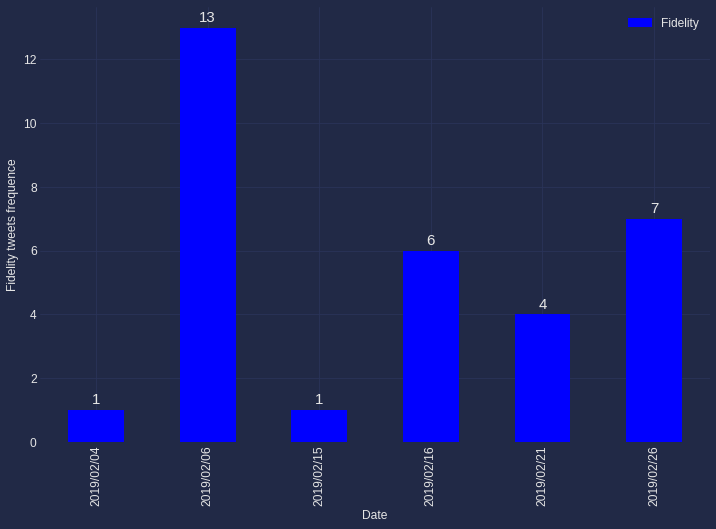

In [ ]:

fidelity_window2.date=pd.to_datetime(fidelity_window2.date)
fidelity_window2
tweets_fidelity2=fidelity_window2.date.value_counts()
tweets_fidelity2=tweets_fidelity2.to_frame()
tweets_fidelity2.reset_index(inplace=True)
tweets_fidelity2.columns=['date','frequency']
tweets_fidelity2.date=pd.to_datetime(tweets_fidelity2.date)
tweets_fidelity2=tweets_fidelity2.sort_values(by='date')
tweets_fidelity2.date=tweets_fidelity2.date.dt.strftime('%Y/%m/%d')
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
axes2=tweets_fidelity2.plot.bar(x='date', y='frequency', color='blue', figsize=(12,8))
axes2.set_xlabel('Date')
axes2.set_ylabel('Fidelity tweets frequence')
axes2.legend(['Fidelity'])
plt.rcParams.update({'font.size': 15})
axes.tick_params(axis='x', rotation=0)
axes2.grid(color='#2A3459')
for p in axes2.patches:
  axes2.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Graph(3) Table 

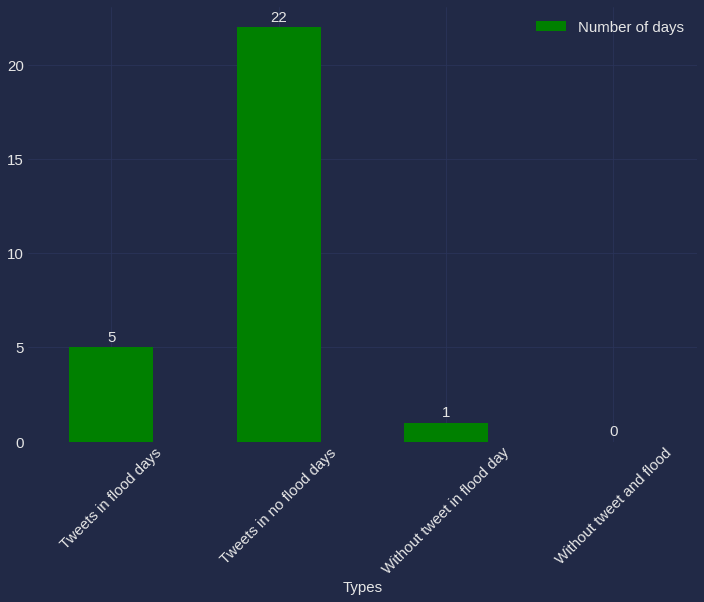

In [ ]:
#Flood days: 6, No flood days: 22, Total of days: 28: in "tweets in no flood days the strength tweets was considered"
table1={"Types":['Tweets in flood days', 'Tweets in no flood days','Without tweet in flood day','Without tweet and flood'], "Number of days":['5','22','1','0']}
table1=pd.DataFrame(table1)
table1
table1['Number of days']=table1['Number of days'].astype(int)
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
axes4=table1.plot.bar(x='Types', y='Number of days', color='green', figsize=(12,8))
axes4.tick_params(axis='x', rotation=45)
axes4.grid(color='#2A3459')
for p in axes4.patches:
  axes4.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Dispersion plot (1)

Text(0, 0.5, 'Frequency of Tweets')

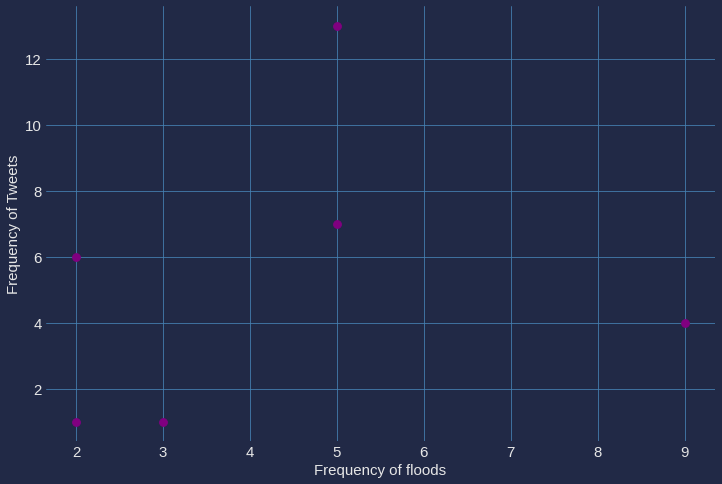

In [ ]:
#Frequence of floods X frequency of fidelity floods 
fidelity_window2.date=pd.to_datetime(fidelity_window2.date)
fidelity_window2.date=fidelity_window2.date.dt.strftime('%d/%m/%Y')
tweetscount2=fidelity_window2.date.value_counts()
floodscount2=floods_window2['DATA,D'].value_counts()
plotscatter=tweetscount2.to_frame().join(floodscount2.to_frame())
plotscatter.columns=['tweets', 'floods']
axes5 = plotscatter.plot.scatter(x='floods', y='tweets', c='purple', figsize=(12,8), s=60)
axes5.grid(color='steelblue')
axes5.set_xlabel("Frequency of floods")
axes5.set_ylabel("Frequency of Tweets")

## Dispersion plot (2) 

In [ ]:
#dispersion(2) The duration of the flood is in decimal terms, every 1 hour is 1.0 in float terms
floods_window2=floods_window2.copy()
floods_window2['DUR_H,N,7,2']=floods_window2['DUR_H,N,7,2'].str.replace(',','.').astype(float)



Text(0, 0.5, 'Frequency of tweets ')

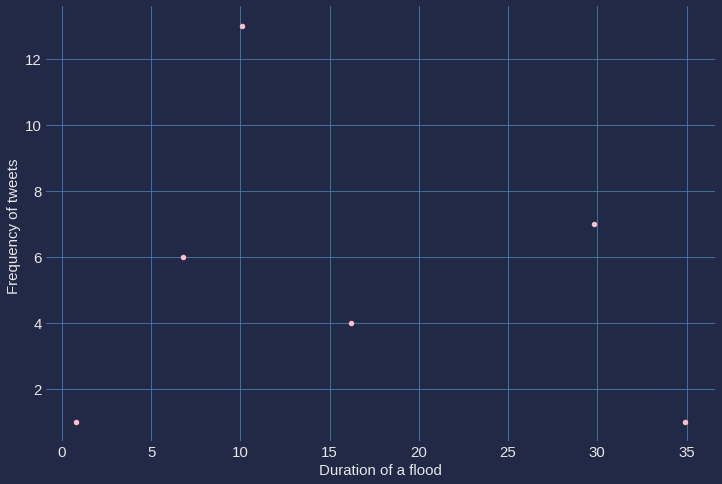

In [ ]:
fidelity_window2.date.value_counts()
scatter3=floods_window2[['DATA,D','DUR_H,N,7,2']]
duration2=scatter3.groupby(['DATA,D']).sum()
duration2=duration2.squeeze()
scatter3=tweetscount2.to_frame().join(duration2.to_frame())
axes6=scatter3.plot.scatter(x='DUR_H,N,7,2',y='date',color='pink', figsize=(12,8))
axes6.grid(color='steelblue')
axes6.set_xlabel("Duration of a flood")
axes6.set_ylabel("Frequency of tweets ")

In [ ]:
duration2

DATA,D
04/02/2019    34.90
06/02/2019    10.09
15/02/2019     0.79
16/02/2019     6.80
21/02/2019    16.22
24/02/2019     1.75
26/02/2019    29.84
Name: DUR_H,N,7,2, dtype: float64

In [ ]:
floods_window2

,"SEQ,N,16,6","LONG,N,16,6","LAT,N,16,6","LOCAL_ED,C,254","LOCALIZACA,C,254","REFERENCIA,C,254","DATA,D","MES,N,16,6","H_INICIO,C,254","H_FIM,C,254","DURACAO,C,254","DUR_H,N,7,2"
30,208,"-46,630781","-23,524646",AV SANTOS DUMONT,AV SANTOS DUMONT,AV DO ESTADO-AEROPORTOSANTANA-SE,04/02/2019,2,03:53:00,09:50:00,05:57:00,5.95
31,228,"-46,63036","-23,52401",AV SANTOS DUMONT,AV SANTOS DUMONT,ALTURA DO NUMERO 536-AEROPORTOSANTANA-SE,04/02/2019,2,07:47:00,07:22:00,23:35:00,23.58
32,230,"-46,641682","-23,537535",AV RIO BRANCO,AV RIO BRANCO,R GAL OSORIO-BAIRROCENTRO-SE,04/02/2019,2,08:08:00,13:30:00,05:22:00,5.37
33,232,"-46,611555","-23,54003",AV CELSO GARCIA,AV CELSO GARCIA,R JOSE DE ALENCAR-CENTROBAIRRO - UNICA-MO,06/02/2019,2,07:42:00,09:38:00,01:56:00,1.93
34,244,"-46,63057","-23,52438",AV DO ESTADO,AV DO ESTADO BOM RETIRO,DA AV PTE SANTOS DUMONT-IPIRANGASANTANA - LOCA...,06/02/2019,2,12:56:00,13:05:00,00:09:00,0.15
35,246,"-46,61478","-23,54181",R GOMES CARDIM,R GOMES CARDIM BRAS,AV RANGEL PESTANA-UNICO - UNICA-MO,06/02/2019,2,12:56:00,16:56:00,04:00:00,4.00
36,260,"-46,62826","-23,55452",R GLICERIO,R GLICERIO,ALTURA DO NUMERO 221-UNICO - NAO INFORMADA-SE,06/02/2019,2,16:01:00,16:48:00,00:47:00,0.78
37,268,"-46,627042","-23,543123",AV MERCURIO,AV MERCURIO,PC S VITO-UNICO - ESQUERDA-SE,06/02/2019,2,18:36:00,21:50:00,03:14:00,3.23
38,289,"-46,63891","-23,54981",PC DA BANDEIRA,PC DA BANDEIRA REPUBLICA,PQ ANHANGABAU-BAIRROCENTRO - LOCAL-SE,15/02/2019,2,21:36:00,22:04:00,00:28:00,0.47
39,293,"-46,640456","-23,549091",PC DA BANDEIRA,PC DA BANDEIRA,AV NOVE DE JULHO-CENTROBAIRRO-SE,15/02/2019,2,21:43:00,22:02:00,00:19:00,0.32


# Third Temporal Window

## Filter words for the third temporal window

In [ ]:
thirdfilter=df.text.str.contains('|'.join(words), case=False )
third_filt_word=df[thirdfilter]
third_filt_word

,date,text,Date,Time
969,2018-12-31 22:45:40-02:00,A #DEUSA_MAIOR ESTÁ UMA RAINHA DE LINDA⚘⚘⚘⚘⚘⚘😘...,2018-12-31,22:45
507,2019-01-01 10:25:28-02:00,Que a chuva da paz esperança felicidade e am...,2019-01-01,10:25
214,2019-01-01 16:58:21-02:00,'O que dizer da chuva... já que todas às palav...,2019-01-01,16:58
162,2019-01-01 18:08:13-02:00,#happynewyear #kickboxing #boxing #training #t...,2019-01-01,18:08
126,2019-01-01 18:56:49-02:00,Feliz ano novo! 🎊🎉\n\nQue 2019 traga grandes a...,2019-01-01,18:56
...,...,...,...,...
58167,2019-03-08 11:55:01-03:00,Traffic Jam because of heavy rainfall downtown...,2019-08-03,11:55
57876,2019-03-08 16:12:59-03:00,Parabéns a todas as mulheres\n\n#diainternacio...,2019-08-03,16:12
57851,2019-03-08 16:35:16-03:00,Meus parabéns a todas rainhas e princesas pelo...,2019-08-03,16:35
57826,2019-03-08 17:06:49-03:00,São Paulo are you ready? This was our last con...,2019-08-03,17:06


### For the third temporal window

In [ ]:
third_window=third_filt_word[((third_filt_word.date> '2019-01-01 00:00:01') & (third_filt_word.date<'2019-01-31 23:59:00'))]

## Filtering the Flood date for the third temporal window 


In [ ]:
flood_third=alagamentos[(alagamentos['MES,N,16,6']==1)]
pd.set_option('display.max_rows', None)
flood_third=flood_third.copy()
flood_third.loc[10:29, 'DATA,D']=flood_third.loc[10:29, 'DATA,D'].dt.strftime('%Y-%d-%m')
flood_third['DATA,D']=flood_third['DATA,D'].astype(str)
flood_third['DATA,D']=flood_third['DATA,D'].map(lambda x: x.lstrip('+-').rstrip(' 00:00:00'))
flood_third['DATA,D']=pd.to_datetime(flood_third['DATA,D'], format='%Y-%d-%m')

In [ ]:
third_window.Date=pd.to_datetime(third_window.Date, format='%Y-%d-%m')
third_window.Date=third_window.Date.dt.strftime('%Y-%d-%m')
third_window.Date=pd.to_datetime(third_window.Date, format='%Y-%d-%m')
strengtn_tweets=third_window[third_window.Date.isin(flood_third['DATA,D'])]
display(strengtn_tweets)

,date,text,Date,Time
507,2019-01-01 10:25:28-02:00,Que a chuva da paz esperança felicidade e am...,2019-01-01,10:25
214,2019-01-01 16:58:21-02:00,'O que dizer da chuva... já que todas às palav...,2019-01-01,16:58
162,2019-01-01 18:08:13-02:00,#happynewyear #kickboxing #boxing #training #t...,2019-01-01,18:08
126,2019-01-01 18:56:49-02:00,Feliz ano novo! 🎊🎉\n\nQue 2019 traga grandes a...,2019-01-01,18:56
100,2019-01-01 19:33:49-02:00,35’ de natação antes da chuva... \n.\n.\n\n.\n...,2019-01-01,19:33
1757,2019-01-01 22:30:04-02:00,Indescritível esse momento foi demais uma pr...,2019-01-01,22:30
13616,2019-01-17 01:08:12-02:00,As lutas tempestades servirão para te deixar ...,2019-01-17,01:08
13385,2019-01-17 11:04:04-02:00,Foi uma ótima jornada! 💚\n\nHoje é o último di...,2019-01-17,11:04
13371,2019-01-17 11:24:13-02:00,The Power of colors.\nA força das cores .\n.\n...,2019-01-17,11:24
13230,2019-01-17 13:46:29-02:00,Já que a moda é o desafio dos 10 anos então ...,2019-01-17,13:46
